### Сравнение ресторанов грузинской и итальянской кухни в Санкт-Петербурге

**Описание**:
Анализ отзывов, оценок посетителей на рестораны грузинской и итальянской кухни в СПБ 

Данные буду брать с сайта Irecommend

In [192]:
from selenium import webdriver
from selenium_stealth import stealth
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
import time
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By
import pandas as pd
import seaborn as sns                    
import matplotlib.pyplot as plt             
%matplotlib inline  
from wordcloud import WordCloud
from stop_words import get_stop_words
import statistics
import plotly.express as px
from scipy.stats import spearmanr
#!pip install streamlit

# Загрузка данных
В данном разделе выполните выгрузку данных из внешних источников и их локальное сохранение

Вы можете вынести всю логику выгрузки в отдельный `.py` скрипт (или набор скриптов), поместив их в директорию `scripts` в корне проекта, но продублируйте весь код здесь тоже, чтобы можно было запустить ноутбук с самого начала

In [193]:
def create_web_driver_stealth() -> webdriver.Chrome:
    options = webdriver.ChromeOptions()
    options.add_argument("start-maximized")
    options.add_experimental_option("excludeSwitches", ["enable-automation"])
    options.add_experimental_option('useAutomationExtension', False)

    s = Service(ChromeDriverManager().install())
    stealth_driver = webdriver.Chrome(service=s, options=options)

    stealth(stealth_driver,
            languages=["en-US", "en"],
            vendor="Google Inc.",
            platform="Win32",
            webgl_vendor="Intel Inc.",
            renderer="Intel Iris OpenGL Engine",
            fix_hairline=True,
            )

    return stealth_driver

In [195]:
def data_collection(base_url):
    driver = create_web_driver_stealth()
    dictionary={}
    url=''
    names = []
    rating = []
    review = []
    likes_list = []
    dislikes_list = []
    
    for i in range(6):
        if i == 0:
            url = base_url
        else:
            url = f'{base_url}?page={i}'
            
        driver.get(url)
        
        name_restaurants = driver.find_elements(by=By.CLASS_NAME, value="title")
        rating_restaurants = driver.find_elements(by=By.CLASS_NAME, value="average-rating")
        reviews = driver.find_elements(by=By.CLASS_NAME, value="extract")
        likes = driver.find_elements(By.CLASS_NAME, value="RecommendRating-like")
        dislikes = driver.find_elements(By.CLASS_NAME, value="RecommendRating-dislike")

        
        for restaurant in name_restaurants:
            names.append(restaurant.text)
        for restaurant_rating in rating_restaurants:
            rating.append(restaurant_rating.text)
        for restaurant_review in reviews:
            review.append(restaurant_review.text)
     
        for like in likes:
            likes_list.append(like.text)
        
        for dislike in dislikes:
            dislikes_list.append(dislike.text)
            
    dictionary["name"] = names
    dictionary["rating"] = rating
    dictionary["reviews"] = review
    dictionary["likes"] = likes_list
    dictionary["dislikes"] = dislikes_list
    return dictionary
    

In [196]:
georgian_data = dict()
italian_data = dict()

In [197]:
georgian_data = data_collection('https://irecommend.ru/catalog/list/9700-9985-23777')

In [198]:
italian_data = data_collection('https://irecommend.ru/catalog/list/9700-9985-11335')

In [201]:
df_italian = pd.DataFrame(italian_data)
df_georgian = pd.DataFrame(georgian_data)

In [206]:
df_italian

,name,rating,reviews,likes,dislikes
0,"Ketch Up Burgers, Санкт-Петербург",Среднее: 4.3,"Самые вкусные бургеры в СПб, возвращаюсь сюда ...",14,2
1,"Марчеллис, Санкт-Петербург",Среднее: 4.1,Ланч по приятной цене с подвохом и убойное соч...,30,7
2,"Город 812, Россия, Санкт-Петербург",Среднее: 5,Ресторан с фиксированной ценой всё по 300 рубл...,1,0
3,"Pizza mafia (Пицца Мафия), Санкт-Петербург",Среднее: 1.9,"Пиццей наш заказ назвать сложно, скорее булка ...",39,144
4,"Челлентани, Санкт-Петербург",Среднее: 3.5,Достойный и уютный ресторан традиционной италь...,1,1
...,...,...,...,...,...
115,"PANE, Санкт-Петербург",Среднее: 2.3,Не понравилось!,0,3
116,"Пицца&хачапури, Санкт-Петербург",Среднее: 5,"СПЕЦ-СПБ. Отличная пиццерия, где можно отведат...",1,0
117,"ЦИНЬ, Санкт-Петербург",Среднее: 4.5,Клуб с новейшим оборудованием и несколькими ви...,2,0
118,"Italy на Большом, Санкт-Петербург",Среднее: 1.5,Italy на Большом,0,2


In [207]:
df_georgian

,name,rating,reviews,likes,dislikes
0,"Чачапури , Санкт-Петербург",Среднее: 4.3,Самая грузинская из всех грузинских кухонь Пет...,3,0
1,"Город 812, Россия, Санкт-Петербург",Среднее: 5,Ресторан с фиксированной ценой всё по 300 рубл...,1,0
2,"Чито Гврито, Санкт-Петербург",Среднее: 3,"Куда торопятся - полуготовые блюда, это не то,...",13,15
3,"КиО кухня, Санкт-Петербург",Среднее: 4,"Минус кухни Кио, меню, что рекомендую из блюд.",5,2
4,"Пельмения, Санкт-Петербург",Среднее: 4.5,"""Ты в Питер ЕСТЬ что ли едешь?""😂 или мои любим...",10,1
...,...,...,...,...,...
107,"Чебуречная №7, Санкт-Петербург",Среднее: 5,Лучшие и самые безопасные чебуреки в городе!,1,0
108,"""Большая черепаха"" Кронштадт, Санкт-Петербург",Среднее: 5,Место которое надо посетить!,1,0
109,"Гранд Кафе DJINN, Санкт-Петербург",Среднее: 3,Испортился со времени открытия,0,1
110,"Пелемения, Санкт-Петербург",Среднее: 5,"Пелемения на Фонтанке, 25",1,0


## Очистка данных и подготовка к анализу
В данном разделе выполните все шаги, связанные с предобработкой:
- приведение ваших данных к формату датафрейма (если это не было сделано выше)
- разведочный анализ (EDA)

Exploratory Data Analysis (EDA) - важный этап анализа данных, помогающий понять, с чем мы вообще имеем дело. [Пример выполнения разведанализа](https://www.kaggle.com/code/imoore/intro-to-exploratory-data-analysis-eda-in-python). Не копируйте все функции в лоб - на что именно стоит смотреть зависит от вашего исследования, однако точно стоит посмотреть на:
- какие переменные (колонки) вообще есть
- каких они типов
- есть ли пропуски
- как переменные распределены (если в этом есть смысл). Для по крайней мере начального анализа распределений и/или трендов в данных, возможно, есть смысл построить визуализации

---

Если хотите, можете попробовать вот [эту библиотеку](https://docs.profiling.ydata.ai/latest/) (полезна для EDA), но огромная просьба - не вставляйте куски кода с ней в конечный отчёт, ибо запуска процесса профилирования может быть довольно долгим, а на больших датасетах это может приводить к довольно тяжелым ноутбукам. Если будете использовать вышеупомянутый `ydata-profiling`, делайте это в отдельном ноутбуке (назовите его `EDA.ipynb`), а в этом постарайтесь обойтись без него

In [208]:
df_italian = df_italian.drop(range(112, 120)) 
# кол-во ресторанов грузинской и итальянской кухни должно быть одинаково, тк я их сравниваю

In [209]:
df_italian

,name,rating,reviews,likes,dislikes
0,"Ketch Up Burgers, Санкт-Петербург",Среднее: 4.3,"Самые вкусные бургеры в СПб, возвращаюсь сюда ...",14,2
1,"Марчеллис, Санкт-Петербург",Среднее: 4.1,Ланч по приятной цене с подвохом и убойное соч...,30,7
2,"Город 812, Россия, Санкт-Петербург",Среднее: 5,Ресторан с фиксированной ценой всё по 300 рубл...,1,0
3,"Pizza mafia (Пицца Мафия), Санкт-Петербург",Среднее: 1.9,"Пиццей наш заказ назвать сложно, скорее булка ...",39,144
4,"Челлентани, Санкт-Петербург",Среднее: 3.5,Достойный и уютный ресторан традиционной италь...,1,1
...,...,...,...,...,...
107,"Any Pasta, Санкт-Петербург",Среднее: 3,❀Подача чая которую вы запомните надолго.❀ Поз...,2,1
108,"Sova Art Prostranstvo, Санкт-Петербург",Среднее: 4.5,Уютное и очень атмосферное место в центре Санк...,2,0
109,"Плюшкин, Санкт-Петербург",Среднее: 4.3,"Всегда захожу в Плюшкин, когда приезжаю в Спб!",2,1
110,"SHAMBALA , Санкт-Петербург",Среднее: 5,В Инстаграм этот ресторан рекомендует лучший н...,2,0


In [210]:
df_georgian

,name,rating,reviews,likes,dislikes
0,"Чачапури , Санкт-Петербург",Среднее: 4.3,Самая грузинская из всех грузинских кухонь Пет...,3,0
1,"Город 812, Россия, Санкт-Петербург",Среднее: 5,Ресторан с фиксированной ценой всё по 300 рубл...,1,0
2,"Чито Гврито, Санкт-Петербург",Среднее: 3,"Куда торопятся - полуготовые блюда, это не то,...",13,15
3,"КиО кухня, Санкт-Петербург",Среднее: 4,"Минус кухни Кио, меню, что рекомендую из блюд.",5,2
4,"Пельмения, Санкт-Петербург",Среднее: 4.5,"""Ты в Питер ЕСТЬ что ли едешь?""😂 или мои любим...",10,1
...,...,...,...,...,...
107,"Чебуречная №7, Санкт-Петербург",Среднее: 5,Лучшие и самые безопасные чебуреки в городе!,1,0
108,"""Большая черепаха"" Кронштадт, Санкт-Петербург",Среднее: 5,Место которое надо посетить!,1,0
109,"Гранд Кафе DJINN, Санкт-Петербург",Среднее: 3,Испортился со времени открытия,0,1
110,"Пелемения, Санкт-Петербург",Среднее: 5,"Пелемения на Фонтанке, 25",1,0


In [211]:
df_georgian.shape 

(112, 5)

In [212]:
df_italian.shape 

(112, 5)

In [213]:
df_georgian.dtypes 
# рейтинг,лайки,дизлайки сейчас-object, а я хочу и разумнее, чтобы эта колонка была формата float

name        object
rating      object
reviews     object
likes       object
dislikes    object
dtype: object

In [214]:
df_italian.dtypes

name        object
rating      object
reviews     object
likes       object
dislikes    object
dtype: object

In [215]:
df_georgian.isnull().sum() 
# нет неопределенных значений, все поля заполнены информацией

name        0
rating      0
reviews     0
likes       0
dislikes    0
dtype: int64

In [216]:
df_italian.isnull().sum() 
# нет неопределенных значений, все поля заполнены информацией

name        0
rating      0
reviews     0
likes       0
dislikes    0
dtype: int64

In [217]:
df_georgian.describe 
# сейчас колонка 'рейтинг'-строка, поэтому мне следует удалить 'Среднее:' и преобразовать колонку в тип float. Также кроме названия в колоне name написано еще Санкт-Петербург/Россия. В этом нет смысла, тк я исследую г. Санкт-Петербург, Россия

<bound method NDFrame.describe of                                               name        rating  \
0                       Чачапури , Санкт-Петербург  Среднее: 4.3   
1               Город 812, Россия, Санкт-Петербург    Среднее: 5   
2                     Чито Гврито, Санкт-Петербург    Среднее: 3   
3                       КиО кухня, Санкт-Петербург    Среднее: 4   
4                       Пельмения, Санкт-Петербург  Среднее: 4.5   
..                                             ...           ...   
107                 Чебуречная №7, Санкт-Петербург    Среднее: 5   
108  "Большая черепаха" Кронштадт, Санкт-Петербург    Среднее: 5   
109              Гранд Кафе DJINN, Санкт-Петербург    Среднее: 3   
110                     Пелемения, Санкт-Петербург    Среднее: 5   
111                 Ресторан Пури, Санкт-Петербург    Среднее: 5   

                                               reviews likes dislikes  
0    Самая грузинская из всех грузинских кухонь Пет...     3        0  
1    

In [219]:
df_italian.describe 
# мне не нравится, что повторяется 'Среднее:  и Санкт-Петербург/ Россия(я и так анализирую тольго город СПб), уберем

<bound method NDFrame.describe of                                            name        rating  \
0             Ketch Up Burgers, Санкт-Петербург  Среднее: 4.3   
1                    Марчеллис, Санкт-Петербург  Среднее: 4.1   
2            Город 812, Россия, Санкт-Петербург    Среднее: 5   
3    Pizza mafia (Пицца Мафия), Санкт-Петербург  Среднее: 1.9   
4                   Челлентани, Санкт-Петербург  Среднее: 3.5   
..                                          ...           ...   
107                  Any Pasta, Санкт-Петербург    Среднее: 3   
108      Sova Art Prostranstvo, Санкт-Петербург  Среднее: 4.5   
109                    Плюшкин, Санкт-Петербург  Среднее: 4.3   
110                  SHAMBALA , Санкт-Петербург    Среднее: 5   
111                Макаронники, Санкт-Петербург  Среднее: 3.7   

                                               reviews likes dislikes  
0    Самые вкусные бургеры в СПб, возвращаюсь сюда ...    14        2  
1    Ланч по приятной цене с подвохом и у

In [220]:
df_georgian['rating'] = df_georgian['rating'].apply(lambda x: x.replace('Среднее: ', ''))

In [222]:
df_georgian['rating'] = pd.to_numeric(df_georgian['rating'])  

In [223]:
df_georgian['likes'] = pd.to_numeric(df_georgian['likes'])

In [228]:
df_georgian['dislikes'] = pd.to_numeric(df_georgian['dislikes'])

In [229]:
df_georgian['name'] = df_georgian['name'].str.split(',', n=1, expand=True)[0]

In [230]:
df_italian['rating'] = df_italian['rating'].apply(lambda x: x.replace('Среднее: ', ''))

In [231]:
df_italian['rating'] = pd.to_numeric(df_italian['rating']) 

In [232]:
df_italian['name'] = df_italian['name'].str.split(',', n=1, expand=True)[0]

In [233]:
df_italian['likes'] = pd.to_numeric(df_italian['likes'])

In [234]:
df_italian

,name,rating,reviews,likes,dislikes
0,Ketch Up Burgers,4.3,"Самые вкусные бургеры в СПб, возвращаюсь сюда ...",14,2
1,Марчеллис,4.1,Ланч по приятной цене с подвохом и убойное соч...,30,7
2,Город 812,5.0,Ресторан с фиксированной ценой всё по 300 рубл...,1,0
3,Pizza mafia (Пицца Мафия),1.9,"Пиццей наш заказ назвать сложно, скорее булка ...",39,144
4,Челлентани,3.5,Достойный и уютный ресторан традиционной италь...,1,1
...,...,...,...,...,...
107,Any Pasta,3.0,❀Подача чая которую вы запомните надолго.❀ Поз...,2,1
108,Sova Art Prostranstvo,4.5,Уютное и очень атмосферное место в центре Санк...,2,0
109,Плюшкин,4.3,"Всегда захожу в Плюшкин, когда приезжаю в Спб!",2,1
110,SHAMBALA,5.0,В Инстаграм этот ресторан рекомендует лучший н...,2,0


In [235]:
df_italian['dislikes'] = pd.to_numeric(df_italian['dislikes'])

In [236]:
df_georgian.dtypes

name         object
rating      float64
reviews      object
likes         int64
dislikes      int64
dtype: object

In [237]:
df_italian.dtypes

name         object
rating      float64
reviews      object
likes         int64
dislikes      int64
dtype: object

In [251]:
df_italian.to_excel("italian_final.xlsx", index=False)

In [252]:
df_georgian.to_excel("georgian_final.xlsx", index=False)

Структура таблицы:

name-название ресторана(object)

rating-рейтинг ресторана (float64)

reviews-отзывы посетителей, только те, которые видны на главной странице с ресторанами(object)

likes-количество лайков за ресторан(int64)

dislikes-количество дизлайков за ресторан(int64)

Важное замечание: количество лайков+количество дизлайков=количеству отзывов на ресторан

In [240]:
df_georgian['cuisine'] = 'Грузинская'
df_italian['cuisine'] = 'Итальянская'

In [241]:
df_restaurants = pd.concat([df_georgian, df_italian], ignore_index=True)

In [242]:
df_restaurants

,name,rating,reviews,likes,dislikes,cuisine
0,Чачапури,4.3,Самая грузинская из всех грузинских кухонь Пет...,3,0,Грузинская
1,Город 812,5.0,Ресторан с фиксированной ценой всё по 300 рубл...,1,0,Грузинская
2,Чито Гврито,3.0,"Куда торопятся - полуготовые блюда, это не то,...",13,15,Грузинская
3,КиО кухня,4.0,"Минус кухни Кио, меню, что рекомендую из блюд.",5,2,Грузинская
4,Пельмения,4.5,"""Ты в Питер ЕСТЬ что ли едешь?""😂 или мои любим...",10,1,Грузинская
...,...,...,...,...,...,...
219,Any Pasta,3.0,❀Подача чая которую вы запомните надолго.❀ Поз...,2,1,Итальянская
220,Sova Art Prostranstvo,4.5,Уютное и очень атмосферное место в центре Санк...,2,0,Итальянская
221,Плюшкин,4.3,"Всегда захожу в Плюшкин, когда приезжаю в Спб!",2,1,Итальянская
222,SHAMBALA,5.0,В Инстаграм этот ресторан рекомендует лучший н...,2,0,Итальянская


In [253]:
df_restaurants.to_excel('restaurants_final.xlsx', index=False)

## Анализ и визуализация
Весь мыслительный процесс, связанный с аналитикой ваших данных, а также построения визуализаций поместите в данный раздел

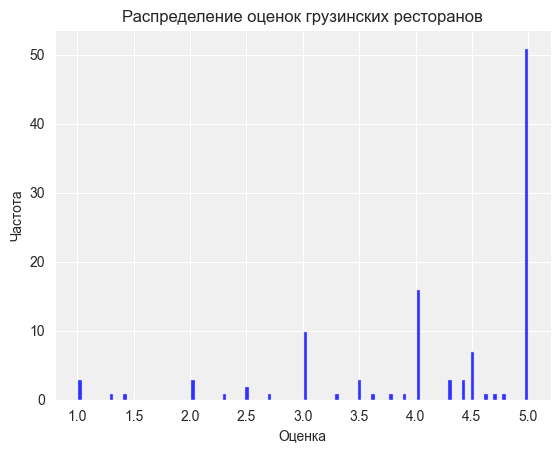

In [260]:
sns.set_style("darkgrid", {'axes.facecolor': '#f0f0f0', 'grid.color': 'white'})
plt.hist(df_georgian['rating'], bins=100, color='blue', alpha=0.8)
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок грузинских ресторанов')
plt.show()

По гистограмме видно, что больше всего оценок у грузинских ресторанов это оценка 5.0. Данные распределены неравномерно, пик в 5.0. Посетители очень удовлетворены, но также есть и неудовлетворительные оценки, их меньше, но они тоже есть. Может быть, это связано с субъективными препочтениями гостей или с долгим ожиданием блюд

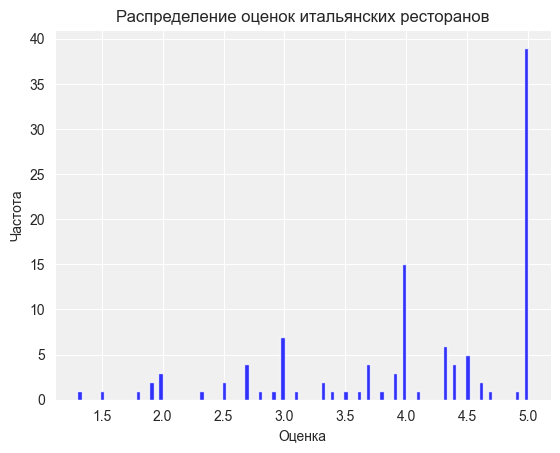

In [261]:
 sns.set_style("darkgrid", {'axes.facecolor': '#f0f0f0', 'grid.color': 'white'})
plt.hist(df_italian['rating'], bins=100, color='blue', alpha=0.8)
plt.xlabel('Оценка')
plt.ylabel('Частота')
plt.title('Распределение оценок итальянских ресторанов')
plt.show()

По гистограмме видно, что данные распределены неравномерно(пик в 5.0). Количество ресторанов с рейтингом 5.0 немного меньше, если сравнивать с грузинскими ресторанами. Не сильно много негативных отзывов. Отрицательных отзывов будет чуууть больше в грузинских ресторанах

In [262]:
statistics.median(df_italian['rating'])

4.3

In [263]:
statistics.median(df_restaurants['rating'])

4.4

In [264]:
statistics.median(df_georgian['rating']) 

4.5

Большинство посетителей грузинских ресторанов остаются довольными(медиана ранв 4.5, что праткически близко к максимальной оценке), а посетители итальянской кухни не так высоко оценивают рестораны(медиана 4.3). 

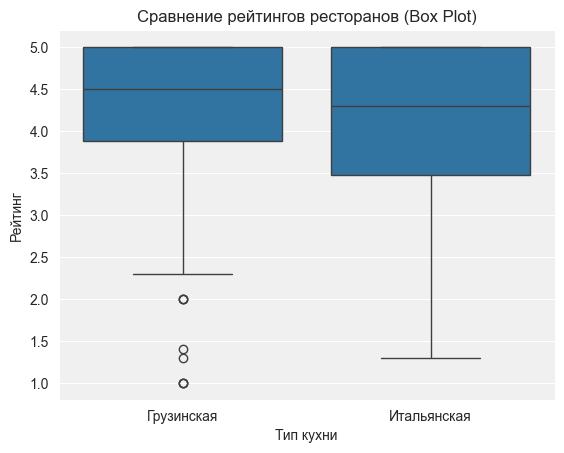

In [265]:
sns.boxplot(x='cuisine', y='rating', data=df_restaurants)
plt.title('Сравнение рейтингов ресторанов (Box Plot)')
plt.xlabel('Тип кухни')
plt.ylabel('Рейтинг')
plt.show()


График показывает, что медиана в грузинских ресторанах находится чуть выше середины boxplot. Большинство грузинских ресторанов имеют почти высокий рейтинг(4.5).
Итальянские рестораны имеют рестораны с более низким рейтингом. В грузинских ресторанах наблюдаются выбросы.
Медиана в итальянских ресторанах находится приблизительно посередине графика. Значит, большинство ресторанов с итальянской кухней имеют средний рейтинг, примерно около оценки 4.3. 
В рейтингах итальянских ресторанов разброс оценок больше, чем в грузинских.
Разница в оценках грузинской кухни и итальянской может быть вызвана тем, что грузинская зачастую ассоциируется с гостеприимством и большими порциями, а итальянская с изысканностью, высокими требованиями к продуктам

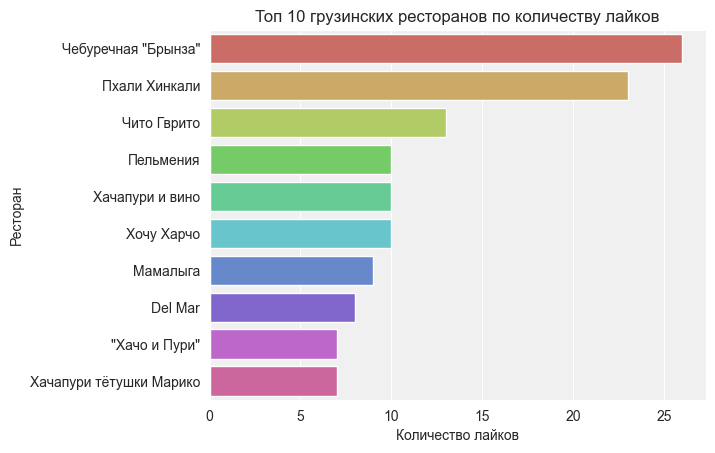

In [269]:
#на графике - 10 ресторанов грузинской кухни с наивысшим кол-ом лайков
sns.set_style("darkgrid", {'axes.facecolor': '#f0f0f0', 'grid.color': 'white'})
df_georgian = df_georgian.sort_values('likes', ascending=False)
df_georgian_top10 = df_georgian.head(10)
sns.barplot(x='likes', y='name', data=df_georgian_top10, palette='hls', hue='name') 
plt.xlabel('Количество лайков')
plt.ylabel('Ресторан')
plt.title('Топ 10 грузинских ресторанов по количеству лайков')
plt.show()

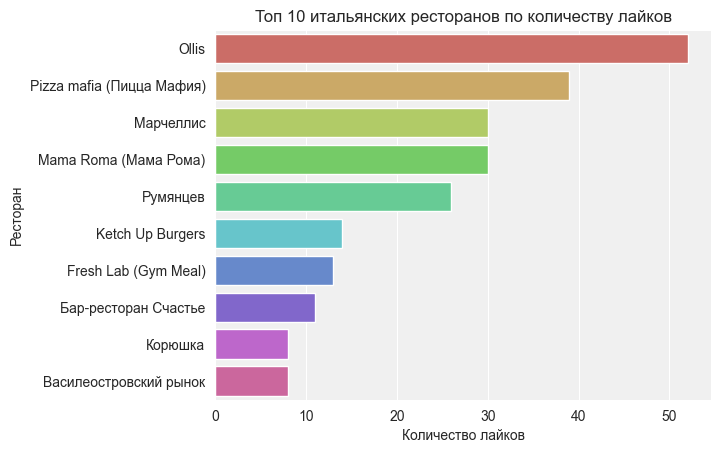

In [270]:
df_italian = df_italian.sort_values('likes', ascending=False)
df_italian_top10 = df_italian.head(10)
sns.barplot(x='likes', y='name', data=df_italian_top10, palette='hls', hue='name') 
plt.xlabel('Количество лайков')
plt.ylabel('Ресторан')
plt.title('Топ 10 итальянских ресторанов по количеству лайков')
plt.show()
#на графике - 10 ресторанов итальянской кухни с наивысшим кол-ом лайков

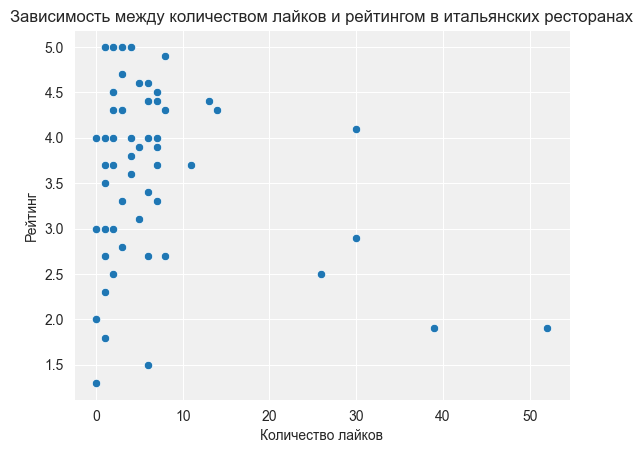

In [271]:
sns.scatterplot(x='likes', y='rating', data=df_italian)
plt.title('Зависимость между количеством лайков и рейтингом в итальянских ресторанах')
plt.xlabel('Количество лайков')
plt.ylabel('Рейтинг')
plt.show()
# По графику видно, что связь нелинейная. Буду использовать корреляцию Спирмена, чтобы установить, есть ли связь между кол-вом лайков и рейтингом в итальянских ресторанах

In [272]:
corr_italian, p_value_italian = spearmanr(df_italian['likes'], df_italian['rating'])

In [273]:
corr_italian

-0.13803718124163764

In [274]:
p_value_italian

0.1466635975231328

Корреляция равна -0.13803718124163764. Это свидетельствует о том, что связь очень слабая отрицательная. P-value равно 0.1466635975231328, то есть может утверждать: количество лайков практически не влияет на рейтинг ресторанов (или наоборот)

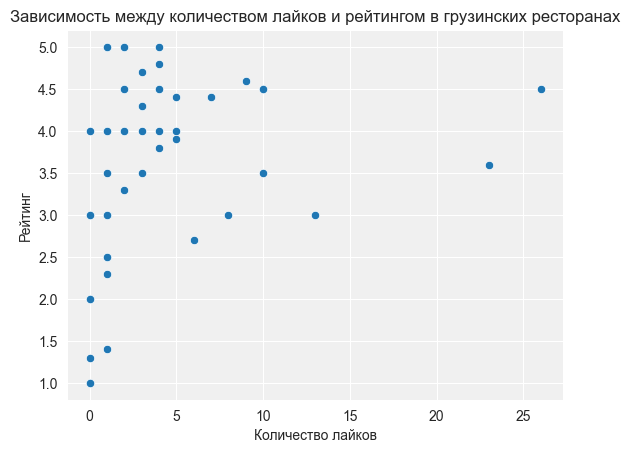

In [275]:
sns.scatterplot(x='likes', y='rating', data=df_georgian)
plt.title('Зависимость между количеством лайков и рейтингом в грузинских ресторанах')
plt.xlabel('Количество лайков')
plt.ylabel('Рейтинг')
plt.show()

In [276]:
corr_georgian, p_value_georgian = spearmanr(df_georgian['likes'], df_georgian['rating'])

In [277]:
corr_georgian

-0.004345658213957676

In [278]:
p_value_georgian

0.9637291826542063

По графику видно,что данные распределены неравномерно
Наблюдается слабая отрицательная связь(корреляция равна -0.004345658213957676)
Также связь не является статистически значимой(p_value= 0.9637291826542063)

В целом, на графиках видно,что несмотря на достаточно большое кол-во лайков у ресторанов, рестораны в районе рейтинга 4(средне), но есть также и с рейтингом ниже 2!

Интересно еще, что рестораны с высоким рейтингом максиум имеют только около 5-10 лайков

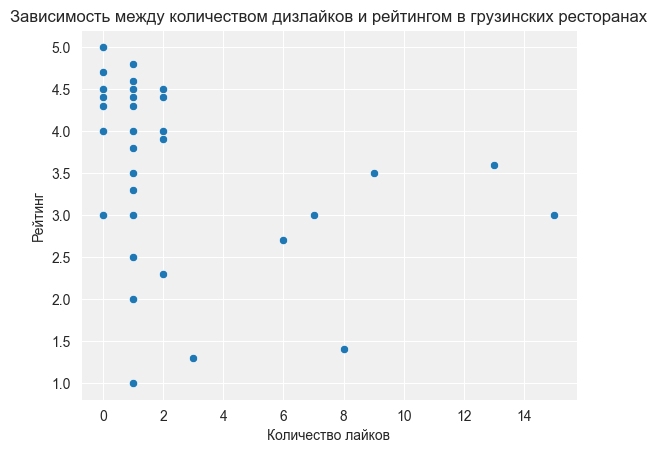

In [279]:
#Проделаем аналогичные операции для установления связи между кол-вом дизлайков и рейтингом
sns.scatterplot(x='dislikes', y='rating', data=df_georgian)
plt.title('Зависимость между количеством дизлайков и рейтингом в грузинских ресторанах')
plt.xlabel('Количество дизлайков')
plt.ylabel('Рейтинг')
plt.show()

In [280]:
corr_georgian_dis, p_value_georgian_dis = spearmanr(df_georgian['dislikes'], df_georgian['rating'])

In [281]:
corr_georgian_dis

-0.6941260156712872

In [282]:
p_value_georgian_dis

2.145831648563388e-17

Значение p_value_georgian_dis=2.145831648563388e-17. Оно свидетельсвтует о наличии связи между количеством дизлайков и рейтинга в грузинских ресторанах

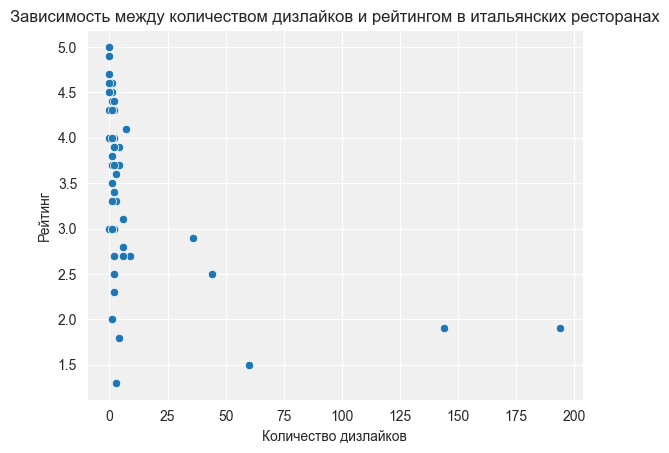

In [283]:
sns.scatterplot(x='dislikes', y='rating', data=df_italian)
plt.title('Зависимость между количеством дизлайков и рейтингом в итальянских ресторанах')
plt.xlabel('Количество дизлайков')
plt.ylabel('Рейтинг')
plt.show()

In [284]:
corr_italian_dis, p_value_italian_dis = spearmanr(df_italian['dislikes'], df_italian['rating'])

In [285]:
corr_italian_dis

-0.7836355444659677

In [286]:
p_value_italian_dis

1.741005822723775e-24

Значение p_value_georgian_dis=1.741005822723775e-24. Оно свидетельсвтует о наличии связи между количеством дизлайков и рейтинга в итальянских ресторанах

На графике видно, что большое кол-во ресторанов имеют 0-25 дизлайков. Интересно, что рестораны имеют как низкий, так и высокий рейтинг

In [287]:
text_georgian = ''
text_georgian = ' '.join(df_georgian['reviews'].astype(str))

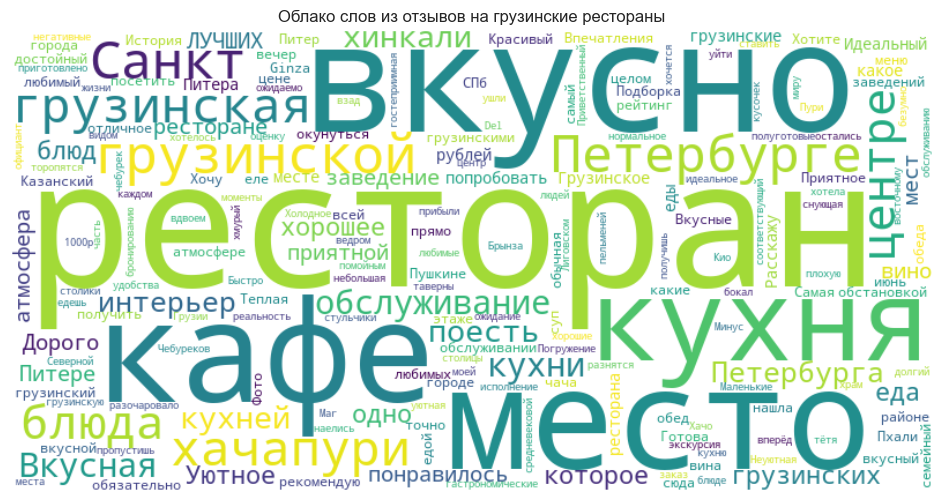

In [288]:
STOPWORDS_RU = get_stop_words('russian')
wordcloud = WordCloud(
    width=800,  
    height=400, 
    background_color='white',  
    stopwords=STOPWORDS_RU,  
    max_words=200, 
    colormap='viridis',
    collocations=False 
).generate(text_georgian)


plt.figure(figsize=(12, 6)) 
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  
plt.savefig('wordcloud_georgian.png')
plt.title('Облако слов из отзывов на грузинские рестораны')
plt.show()

In [289]:
text_italian = ''
text_italian = ' '.join(df_italian['reviews'].astype(str))

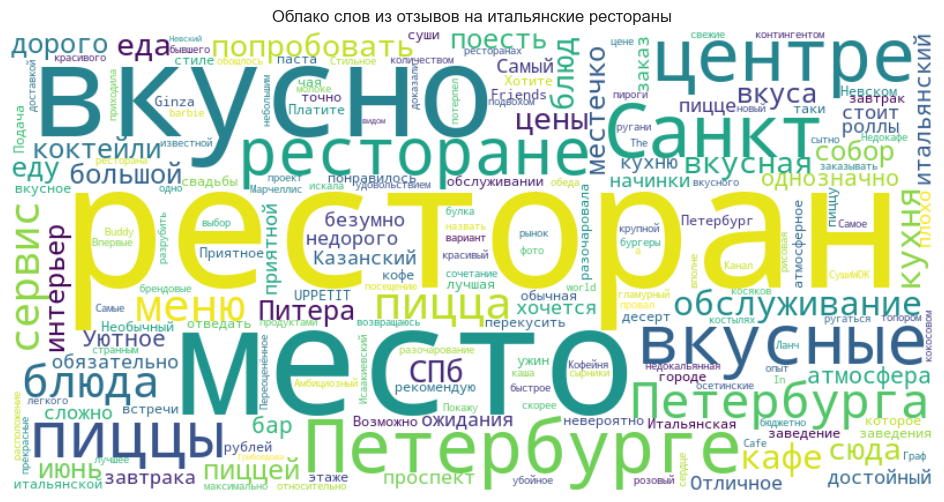

In [290]:
STOPWORDS_RU = get_stop_words('russian')
wordcloud = WordCloud(
    width=800,  
    height=400, 
    background_color='white', 
    stopwords=STOPWORDS_RU,  
    max_words=200,
    colormap='viridis',  
    collocations=False 
).generate(text_italian)

plt.figure(figsize=(12, 6))  
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")  
plt.savefig('wordcloud_italian.png')

plt.title('Облако слов из отзывов на итальянские рестораны')
plt.show()

Проанализировав облака слов, я заметила, что часто употребляются слова:"интерьер", "атмосфера", "уютное", "обслуживание". Кроме этого, много раз упоминаются
слова: хинкали, хачапури(наверное, это одни из самых любимых блюд посетителей), вкусная.
Наиболее часто встречющиеся слова в отзывах на итальяскую кухню: сервис, блюда, пицца, обслуживание, еда, вкусное, безумно. 


## Выводы 
1) Рестораны с высоким рейтингом максиум имеют около 5-10 лайков

2) Анализ подтверждает мысль, что качество не равно популярность. Рестораны с высоким рейтингом могут иметь малое количество лайков

3) Если у ресторанов лайков много, но сами они занимают в рейтинге не высокое место, 
то,скорее всего, маркетинг у таких заведений на высоком уровне. Быть может, они даже дают какие-то плюшки за оставленный отзыв. 
Замечание: в нашем случае кол-во лайков+ кол-во дизлайков = кол-во отзывов

4) Есть связь между количеством дизлайков и рейтингом ресторанов обеих кухонь. Может быть, негативные отзывы вызывают больше реакции

5) Вероятность того, что выбранное заведение грузинской кухни понравится больше,чем выбранное заведение итальянской кухни

6) В своем проекте я представила топ-10 ресторанов по разным критериям(рейтинг, кол-во лайков/дизлайков), поэтому в следующий раз я пойду в ресторан из предложенного мною списка 

7) Говоря об анализе слов, я поняла, что акцент в отзывах на грузинские рестораны делается на
обстановку и атмосферу, а в отзывах на итальяскую кухню на еду и эмоции


## Обсуждение
В этом разделе опишите:
- Что вы хотели сделать в рамках вашего исследования и что сделать удалось
- Что сделать не удалось и почему
- Как ваше исследование можно было бы улучшить
- Кому ваше исследование может быть полезно (или что можно сделать дополнительно, чтобы оно было полезным)

Вам не обязательно ставить планку научных работ. Например, если ваш датасет содержит информацию о 100 рецептов борща, а ваше исследование направлено на нахождение самого лучшего с точки зрения состава и пользовательских оценок, то оно банально может быть полезно людям, которые пытаются найти золотую середину в готовке этого самого борща (а если логику вашего исследования повторить с условными тефтелями, то оно ещё и переносимо на другие кейсы!)

В рамках моего исследования я хотела сравнить грузинские и итальянские рестораны, найти какие-то закономерности, 
а также выявить топ-10 ресторанов по различным критериям. Это удалось сделать.

Изначально я планировала брать данные с сайта Tripadvisor, однако меня он постоянно блокировал, а API у него платный. 
В Tripadvisor, конечно, больше информации о ресторанах, например, о ценовом сегменте. Еще там намного больше представлено отзывов.
В будущем хотелось бы собрать больше информации о ресторанах с сайтов, которые предоставляют такую информацию. (Irecommend в этом плане немного скудный). Также можно в будущем анализировать отзывы не только которые отображаются на главной странице, но и те, которые видны при переходе на вкладку 'Читать все отзывы'.

Мое исследование может быть полезно маркетологам ресторанов для разработки стратегии продвижения по привлечению новых клиентов, они могут увидеть рейтинг своего ресторана относительно других. Быть может, шеф-повара, благодаря облаку слов, смогут проанализировать часто встречащиеся блюда и сформировать меню в соответствии с результатами. Логику моего исследования можно повторить с любыми ресторанами сайта, других сайтов с ресторанами. Поменяв названия колонок, адаптиров их под новую тему, можно анализировать развлечения, отели и так далее.